# Indexing Landsat data available on AWS into datacube

In [1]:
!datacube --help

Usage: datacube [OPTIONS] COMMAND [ARGS]...

  Data Cube command-line interface

Options:
  --version
  -v, --verbose           Use multiple times for more verbosity
  --log-file TEXT         Specify log file
  -C, --config_file TEXT
  --log-queries           Print database queries.
  -h, --help              Show this message and exit.

Commands:
  dataset        Dataset management commands
  ingest         Ingest datasets
  metadata_type  Metadata type commands
  product        Product commands
  system         System commands
  user           User management commands


In [2]:
!datacube --version

Open Data Cube core, version 1.5.4


## Sample product definition for LANDSAT_8 Collection1 level 1 data

name: ls8_level1
description: Landsat 8 Level 1 Collection-1 OLI-TIRS
metadata_type: eo

metadata:
    platform:
        code: LANDSAT_8
    instrument:
        name: OLI_TIRS
    product_type: Level1
    format:
        name: GeoTiff

measurements:
    - name: 'blue'
      aliases: [band_2, blue]
      dtype: int16
      nodata: -9999
      units: '1'

    - name: 'green'
      aliases: [band_3, green]
      dtype: int16
      nodata: -9999
      units: '1'

    - name: 'red'
      aliases: [band_4, red]
      dtype: int16
      nodata: -9999
      units: '1'

    - name: 'nir'
      aliases: [band_5, nir]
      dtype: int16
      nodata: -9999
      units: '1'


## Adding product definition to datacube

In [3]:
!datacube product list 

No products discovered :(


In [4]:
!datacube product add ls_sample_product.yaml

Added "ls8_level1"


In [5]:
!datacube product list

   name        description                              product_type instrument format   platform  
id                                                                                                 
1   ls8_level1  Landsat 8 Level 1 Collection-1 OLI-TIRS  Level1       OLI_TIRS   GeoTiff  LANDSAT_8


# Indexing 'landsat-pds' public bucket data 

In [6]:
!python ls_public_bucket.py 

Usage: ls_public_bucket.py [OPTIONS] BUCKET_NAME

Error: Missing argument "bucket_name".


### Indicate which bucket to access and index 
### Since 'landsat-pds' bucket is spread across the Globe,
### there is an option for prefix to index path and row  
### For Example:

Collection 1 Data

The data are organized using a directory structure based on each scene’s path and row. For instance, the files for Landsat scene LC08_L1TP_139045_20170304_20170316_01_T1 are available in the following location: s3://landsat-pds/c1/L8/139/045/LC08_L1TP_139045_20170304_20170316_01_T1/

The “c1” refers to Collection 1, the “L8” refers to Landsat 8, “139” refers to the scene’s path, “045” refers to the scene’s row, and the final directory matches the product’s identifier, which uses the following naming convention: LXSS_LLLL_PPPRRR_YYYYMMDD_yyymmdd_CC_TX, in which:

    L = Landsat
    X = Sensor
    SS = Satellite
    PPP = WRS path
    RRR = WRS row
    YYYYMMDD = Acquisition date
    yyyymmdd = Processing date
    CC = Collection number
    TX = Collection category
### So the prefix here can be c1/L8/033/042

In [7]:
!time python ls_public_bucket.py landsat-pds -p c1/L8/033/042/

2018-02-15 11:47:15,375 INFO Found credentials in shared credentials file: ~/.aws/credentials
2018-02-15 11:47:15,408 INFO Bucket : landsat-pds
2018-02-15 11:47:15,411 INFO Calling paginated s3:list_objects with {'Bucket': 'landsat-pds', 'Prefix': 'c1/L8/033/042/'}
2018-02-15 11:47:15,415 INFO Starting new HTTPS connection (1): landsat-pds.s3.amazonaws.com
2018-02-15 11:47:19,177 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20170313_20170328_01_T1/LC08_L1TP_033042_20170313_20170328_01_T1_MTL.txt
2018-02-15 11:47:19,177 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'c1/L8/033/042/LC08_L1TP_033042_20170313_20170328_01_T1/LC08_L1TP_033042_20170313_20170328_01_T1_MTL.txt'}
2018-02-15 11:47:19,384 INFO Indexing 62a89ab0-df57-57fb-92c8-3554b6c76861
2018-02-15 11:47:19,393 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20170313_20170328_01_T1/LC08_L1TP_033042_20170313_20170328_01_T1_MTL.txt
2018-02-15 11:47:19,393 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20170329_2017

2018-02-15 11:47:22,905 INFO Indexing 4610ff32-ee21-5bae-86d7-567847d7c367
2018-02-15 11:47:22,910 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20170804_20170805_01_RT/LC08_L1TP_033042_20170804_20170805_01_RT_MTL.txt
2018-02-15 11:47:22,910 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20170804_20170812_01_T1/LC08_L1TP_033042_20170804_20170812_01_T1_MTL.txt
2018-02-15 11:47:22,910 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'c1/L8/033/042/LC08_L1TP_033042_20170804_20170812_01_T1/LC08_L1TP_033042_20170804_20170812_01_T1_MTL.txt'}
2018-02-15 11:47:23,208 INFO Indexing 1e5a903d-cb6f-53c1-8e78-79a857aeaa3d
2018-02-15 11:47:23,213 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20170804_20170812_01_T1/LC08_L1TP_033042_20170804_20170812_01_T1_MTL.txt
2018-02-15 11:47:23,213 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20170820_20170821_01_RT/LC08_L1TP_033042_20170820_20170821_01_RT_MTL.txt
2018-02-15 11:47:23,213 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 

2018-02-15 11:47:28,646 INFO Indexing 9f2b93c8-1db9-50c7-8b48-5551911d9898
2018-02-15 11:47:28,651 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20171124_20171206_01_T1/LC08_L1TP_033042_20171124_20171206_01_T1_MTL.txt
2018-02-15 11:47:28,651 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20171210_20171210_01_RT/LC08_L1TP_033042_20171210_20171210_01_RT_MTL.txt
2018-02-15 11:47:28,651 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'c1/L8/033/042/LC08_L1TP_033042_20171210_20171210_01_RT/LC08_L1TP_033042_20171210_20171210_01_RT_MTL.txt'}
2018-02-15 11:47:28,914 INFO Indexing af51a8ab-9f31-59a7-b6b6-adaaa7dbd149
2018-02-15 11:47:28,918 INFO Indexing c1/L8/033/042/LC08_L1TP_033042_20171210_20171210_01_RT/LC08_L1TP_033042_20171210_20171210_01_RT_MTL.txt
2018-02-15 11:47:28,919 INFO Processing c1/L8/033/042/LC08_L1TP_033042_20171210_20171223_01_T1/LC08_L1TP_033042_20171210_20171223_01_T1_MTL.txt
2018-02-15 11:47:28,919 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 

## Indexing complete for Collection 1 path 033 and row 042 
## Time to index 39 datasets = ~17 seconds

## Check datasets indexed :

In [8]:
!datacube dataset --help

Usage: datacube dataset [OPTIONS] COMMAND [ARGS]...

  Dataset management commands

Options:
  -h, --help  Show this message and exit.

Commands:
  add      Add datasets to the Data Cube
  archive  Archive datasets
  info     Display dataset information
  restore  Restore datasets
  search   Search available Datasets  Search...
  update   Update datasets in the Data Cube


In [9]:
!datacube dataset search product ='ls8_level1'

id: 62a89ab0-df57-57fb-92c8-3554b6c76861
product: ls8_level1
status: active
locations:
- http://landsat-pds.s3.amazonaws.com/c1/L8/033/042/LC08_L1TP_033042_20170313_20170328_01_T1/LC08_L1TP_033042_20170313_20170328_01_T1_MTL.txt
fields:
    instrument: OLI_TIRS
    lat: {begin: 24.923891317485154, end: 27.044837184680176}
    lon: {begin: -109.35854521931238, end: -107.05790554900032}
    platform: LANDSAT_8
    product_type: Level1
    time: {begin: '2017-03-13T17:41:01.252643+00:00', end: '2017-03-13T17:41:01.252643+00:00'}
---
id: f3519df1-867c-58a9-ba32-b567368cdae5
product: ls8_level1
status: active
locations:
- http://landsat-pds.s3.amazonaws.com/c1/L8/033/042/LC08_L1TP_033042_20170329_20170414_01_T1/LC08_L1TP_033042_20170329_20170414_01_T1_MTL.txt
fields:
    instrument: OLI_TIRS
    lat: {begin: 24.923891317485154, end: 27.044873056716014}
    lon: {begin: -109.36151611568242, end: -107.05790554900032}
    platform: LANDSAT_8
    product_type: Level1
    time: {begin: '2017-03-

id: f7914019-78ff-57ae-994f-b4aee5a86ba5
product: ls8_level1
status: active
locations:
- http://landsat-pds.s3.amazonaws.com/c1/L8/033/042/LC08_L1TP_033042_20170905_20170917_01_T1/LC08_L1TP_033042_20170905_20170917_01_T1_MTL.txt
fields:
    instrument: OLI_TIRS
    lat: {begin: 24.92358232942467, end: 27.044729179050034}
    lon: {begin: -109.34963256156578, end: -107.04583952120245}
    platform: LANDSAT_8
    product_type: Level1
    time: {begin: '2017-09-05T17:41:23.498772+00:00', end: '2017-09-05T17:41:23.498772+00:00'}
---
id: d2cb791b-fbb6-5ebc-ae51-3d9c1f50ddc2
product: ls8_level1
status: active
locations:
- http://landsat-pds.s3.amazonaws.com/c1/L8/033/042/LC08_L1TP_033042_20170921_20170922_01_RT/LC08_L1TP_033042_20170921_20170922_01_RT_MTL.txt
fields:
    instrument: OLI_TIRS
    lat: {begin: 24.923659664509678, end: 27.04476524584673}
    lon: {begin: -109.35260344224461, end: -107.04885600824693}
    platform: LANDSAT_8
    product_type: Level1
    time: {begin: '2017-09-21

    time: {begin: '2018-01-27T17:41:12.670190+00:00', end: '2018-01-27T17:41:12.670190+00:00'}
---
id: 73d01889-9c84-54ac-bc9a-45763d5bf075
product: ls8_level1
status: active
locations:
- http://landsat-pds.s3.amazonaws.com/c1/L8/033/042/LC08_L1TP_033042_20180127_20180207_01_T1/LC08_L1TP_033042_20180127_20180207_01_T1_MTL.txt
fields:
    instrument: OLI_TIRS
    lat: {begin: 24.92358232942467, end: 27.044729179050034}
    lon: {begin: -109.34963256156578, end: -107.04583952120245}
    platform: LANDSAT_8
    product_type: Level1
    time: {begin: '2018-01-27T17:41:12.670190+00:00', end: '2018-01-27T17:41:12.670190+00:00'}
---
id: 71103df6-100a-52b4-bd0c-be44bd576a99
product: ls8_level1
status: active
locations:
- http://landsat-pds.s3.amazonaws.com/c1/L8/033/042/LC08_L1TP_033042_20180212_20180212_01_RT/LC08_L1TP_033042_20180212_20180212_01_RT_MTL.txt
fields:
    instrument: OLI_TIRS
    lat: {begin: 24.92358232942467, end: 27.044693047333975}
    lon: {begin: -109.3466616861362, end: -

### The above cell lists the datasets available for product 'ls8_level1'

In [10]:
!datacube dataset search product ='ls8_level1' |grep id |wc

     39      78    1599


### There are 39 datasets available for LANDSAT 8 Collection 1 for path 033 and row 042 

### Indexing Precollection data for same path and row 

In [11]:
!time python ls_public_bucket.py landsat-pds -p L8/033/042/

2018-02-15 11:52:02,048 INFO Found credentials in shared credentials file: ~/.aws/credentials
2018-02-15 11:52:02,080 INFO Bucket : landsat-pds
2018-02-15 11:52:02,083 INFO Calling paginated s3:list_objects with {'Bucket': 'landsat-pds', 'Prefix': 'L8/033/042/'}
2018-02-15 11:52:02,087 INFO Starting new HTTPS connection (1): landsat-pds.s3.amazonaws.com
2018-02-15 11:52:07,422 INFO Processing L8/033/042/LC80330422013109LGN01/LC80330422013109LGN01_MTL.txt
2018-02-15 11:52:07,422 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422013109LGN01/LC80330422013109LGN01_MTL.txt'}
2018-02-15 11:52:07,695 INFO Indexing 2e1f0d0f-3c53-5441-adaa-f914ae9f778d
2018-02-15 11:52:07,704 INFO Indexing L8/033/042/LC80330422013109LGN01/LC80330422013109LGN01_MTL.txt
2018-02-15 11:52:07,704 INFO Processing L8/033/042/LC80330422013125LGN01/LC80330422013125LGN01_MTL.txt
2018-02-15 11:52:07,704 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC8033

2018-02-15 11:52:11,588 INFO Indexing c348c24e-6bec-5258-9e55-9c771a7e9936
2018-02-15 11:52:11,593 INFO Indexing L8/033/042/LC80330422014048LGN00/LC80330422014048LGN00_MTL.txt
2018-02-15 11:52:11,593 INFO Processing L8/033/042/LC80330422014064LGS01/LC80330422014064LGS01_MTL.txt
2018-02-15 11:52:11,593 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422014064LGS01/LC80330422014064LGS01_MTL.txt'}
2018-02-15 11:52:11,855 INFO Indexing 09bfb53e-ba6f-529a-b14d-c37b9dd43489
2018-02-15 11:52:11,860 INFO Indexing L8/033/042/LC80330422014064LGS01/LC80330422014064LGS01_MTL.txt
2018-02-15 11:52:11,860 INFO Processing L8/033/042/LC80330422014080LGN00/LC80330422014080LGN00_MTL.txt
2018-02-15 11:52:11,860 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422014080LGN00/LC80330422014080LGN00_MTL.txt'}
2018-02-15 11:52:12,063 INFO Indexing de2bdacb-e315-5d9c-b64d-da9a03f66b0c
2018-02-15 11:52:12,068 INFO Indexing L8/033/042/LC803304

2018-02-15 11:52:20,089 INFO Indexing 69721433-dd1c-5ce3-85c8-cab1af3852d7
2018-02-15 11:52:20,094 INFO Indexing L8/033/042/LC80330422014352LGN00/LC80330422014352LGN00_MTL.txt
2018-02-15 11:52:20,094 INFO Processing L8/033/042/LC80330422015003LGN00/LC80330422015003LGN00_MTL.txt
2018-02-15 11:52:20,094 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422015003LGN00/LC80330422015003LGN00_MTL.txt'}
2018-02-15 11:52:20,284 INFO Indexing ecc320eb-b7d4-54e4-b244-79e2c7b1f5cc
2018-02-15 11:52:20,289 INFO Indexing L8/033/042/LC80330422015003LGN00/LC80330422015003LGN00_MTL.txt
2018-02-15 11:52:20,289 INFO Processing L8/033/042/LC80330422015019LGN00/LC80330422015019LGN00_MTL.txt
2018-02-15 11:52:20,289 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422015019LGN00/LC80330422015019LGN00_MTL.txt'}
2018-02-15 11:52:20,491 INFO Indexing 3e480a08-bc02-5238-bf3e-09499b41166b
2018-02-15 11:52:20,495 INFO Indexing L8/033/042/LC803304

2018-02-15 11:52:28,445 INFO Indexing 4f399920-2729-5e39-9e77-3992960a587d
2018-02-15 11:52:28,450 INFO Indexing L8/033/042/LC80330422015307LGN00/LC80330422015307LGN00_MTL.txt
2018-02-15 11:52:28,450 INFO Processing L8/033/042/LC80330422015323LGN00/LC80330422015323LGN00_MTL.txt
2018-02-15 11:52:28,451 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422015323LGN00/LC80330422015323LGN00_MTL.txt'}
2018-02-15 11:52:28,712 INFO Indexing 37b713e5-fe95-57f9-bb75-de3be48074e7
2018-02-15 11:52:28,716 INFO Indexing L8/033/042/LC80330422015323LGN00/LC80330422015323LGN00_MTL.txt
2018-02-15 11:52:28,716 INFO Processing L8/033/042/LC80330422015339LGN00/LC80330422015339LGN00_MTL.txt
2018-02-15 11:52:28,716 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422015339LGN00/LC80330422015339LGN00_MTL.txt'}
2018-02-15 11:52:28,932 INFO Indexing aedb7ed3-d44f-5529-8551-05e733cc6dbf
2018-02-15 11:52:28,938 INFO Indexing L8/033/042/LC803304

2018-02-15 11:52:32,662 INFO Indexing 98f1e11c-fcaf-5c9e-9b3a-979d8597c0f5
2018-02-15 11:52:32,667 INFO Indexing L8/033/042/LC80330422016246LGN00/LC80330422016246LGN00_MTL.txt
2018-02-15 11:52:32,667 INFO Processing L8/033/042/LC80330422016262LGN00/LC80330422016262LGN00_MTL.txt
2018-02-15 11:52:32,667 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422016262LGN00/LC80330422016262LGN00_MTL.txt'}
2018-02-15 11:52:32,862 INFO Indexing b19503d1-cf68-5292-ba87-7deaf5db1cd4
2018-02-15 11:52:32,866 INFO Indexing L8/033/042/LC80330422016262LGN00/LC80330422016262LGN00_MTL.txt
2018-02-15 11:52:35,785 INFO Processing L8/033/042/LC80330422016278LGN00/LC80330422016278LGN00_MTL.txt
2018-02-15 11:52:35,785 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/033/042/LC80330422016278LGN00/LC80330422016278LGN00_MTL.txt'}
2018-02-15 11:52:36,006 INFO Indexing a3d29410-2f39-51c3-a350-e02dade2957c
2018-02-15 11:52:36,011 INFO Indexing L8/033/042/LC803304

## Time taken to index pre collection level1 = 38 seconds

In [12]:
!datacube dataset search product ='ls8_level1' |grep id |wc

    130     260    5330


## 91 datasets available for precollection path 033 and row 042

## Indexing path =046 and row = 028

In [13]:
!time python ls_public_bucket.py landsat-pds -p L8/046/028/

2018-02-15 11:57:22,754 INFO Found credentials in shared credentials file: ~/.aws/credentials
2018-02-15 11:57:22,786 INFO Bucket : landsat-pds
2018-02-15 11:57:22,789 INFO Calling paginated s3:list_objects with {'Bucket': 'landsat-pds', 'Prefix': 'L8/046/028/'}
2018-02-15 11:57:22,793 INFO Starting new HTTPS connection (1): landsat-pds.s3.amazonaws.com
2018-02-15 11:57:27,719 INFO Processing L8/046/028/LC80460282013104LGN01/LC80460282013104LGN01_MTL.txt
2018-02-15 11:57:27,719 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282013104LGN01/LC80460282013104LGN01_MTL.txt'}
2018-02-15 11:57:27,943 INFO Indexing 99bd5c38-2184-5eac-8f67-8fde464b8f14
2018-02-15 11:57:27,952 INFO Indexing L8/046/028/LC80460282013104LGN01/LC80460282013104LGN01_MTL.txt
2018-02-15 11:57:27,952 INFO Processing L8/046/028/LC80460282013120LGN01/LC80460282013120LGN01_MTL.txt
2018-02-15 11:57:27,952 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC8046

2018-02-15 11:57:33,264 INFO Indexing 991af079-f851-5b57-b4c2-6420eb50899c
2018-02-15 11:57:33,268 INFO Indexing L8/046/028/LC80460282014027LGN00/LC80460282014027LGN00_MTL.txt
2018-02-15 11:57:33,269 INFO Processing L8/046/028/LC80460282014043LGN00/LC80460282014043LGN00_MTL.txt
2018-02-15 11:57:33,269 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282014043LGN00/LC80460282014043LGN00_MTL.txt'}
2018-02-15 11:57:33,469 INFO Indexing 14defaf3-466e-5a72-b1f5-7576520ec226
2018-02-15 11:57:33,474 INFO Indexing L8/046/028/LC80460282014043LGN00/LC80460282014043LGN00_MTL.txt
2018-02-15 11:57:33,474 INFO Processing L8/046/028/LC80460282014059LGN00/LC80460282014059LGN00_MTL.txt
2018-02-15 11:57:33,475 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282014059LGN00/LC80460282014059LGN00_MTL.txt'}
2018-02-15 11:57:33,798 INFO Indexing d27533d4-d406-5d29-93a7-0e66cbd6d83c
2018-02-15 11:57:33,803 INFO Indexing L8/046/028/LC804602

2018-02-15 11:57:42,279 INFO Indexing d3b7fbca-d334-5ff1-a765-aefa5629b418
2018-02-15 11:57:42,285 INFO Indexing L8/046/028/LC80460282014331LGN00/LC80460282014331LGN00_MTL.txt
2018-02-15 11:57:42,285 INFO Processing L8/046/028/LC80460282014347LGN00/LC80460282014347LGN00_MTL.txt
2018-02-15 11:57:42,285 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282014347LGN00/LC80460282014347LGN00_MTL.txt'}
2018-02-15 11:57:42,487 INFO Indexing fad04526-ef17-5dea-ae4f-5e29ad6355dd
2018-02-15 11:57:42,491 INFO Indexing L8/046/028/LC80460282014347LGN00/LC80460282014347LGN00_MTL.txt
2018-02-15 11:57:42,492 INFO Processing L8/046/028/LC80460282014363LGN00/LC80460282014363LGN00_MTL.txt
2018-02-15 11:57:42,492 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282014363LGN00/LC80460282014363LGN00_MTL.txt'}
2018-02-15 11:57:42,709 INFO Indexing f9230158-301b-56fa-ae94-93378ba6b621
2018-02-15 11:57:42,714 INFO Indexing L8/046/028/LC804602

2018-02-15 11:57:50,059 INFO Indexing bd5a900d-d65d-5e45-a73e-6dc7e11932d1
2018-02-15 11:57:50,064 INFO Indexing L8/046/028/LC80460282015286LGN00/LC80460282015286LGN00_MTL.txt
2018-02-15 11:57:50,064 INFO Processing L8/046/028/LC80460282015302LGN00/LC80460282015302LGN00_MTL.txt
2018-02-15 11:57:50,064 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282015302LGN00/LC80460282015302LGN00_MTL.txt'}
2018-02-15 11:57:50,265 INFO Indexing d75e4c2f-1dca-59fb-af5a-718d56237227
2018-02-15 11:57:50,270 INFO Indexing L8/046/028/LC80460282015302LGN00/LC80460282015302LGN00_MTL.txt
2018-02-15 11:57:50,270 INFO Processing L8/046/028/LC80460282015302LGN01/LC80460282015302LGN01_MTL.txt
2018-02-15 11:57:50,270 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282015302LGN01/LC80460282015302LGN01_MTL.txt'}
2018-02-15 11:57:50,489 INFO Indexing b724c7e1-1506-5722-8212-4dfd63ee3cbd
2018-02-15 11:57:50,494 INFO Indexing L8/046/028/LC804602

2018-02-15 11:57:54,517 INFO Indexing 30e87ff8-38c0-590b-a192-7121a16ba908
2018-02-15 11:57:54,522 INFO Indexing L8/046/028/LC80460282016209LGN00/LC80460282016209LGN00_MTL.txt
2018-02-15 11:57:54,522 INFO Processing L8/046/028/LC80460282016225LGN00/LC80460282016225LGN00_MTL.txt
2018-02-15 11:57:54,522 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282016225LGN00/LC80460282016225LGN00_MTL.txt'}
2018-02-15 11:57:54,833 INFO Indexing 5b726ebe-4f94-502e-b801-ead05760a61f
2018-02-15 11:57:54,838 INFO Indexing L8/046/028/LC80460282016225LGN00/LC80460282016225LGN00_MTL.txt
2018-02-15 11:57:57,438 INFO Processing L8/046/028/LC80460282016241LGN00/LC80460282016241LGN00_MTL.txt
2018-02-15 11:57:57,439 INFO Calling s3:get_object with {'Bucket': 'landsat-pds', 'Key': 'L8/046/028/LC80460282016241LGN00/LC80460282016241LGN00_MTL.txt'}
2018-02-15 11:57:57,639 INFO Indexing 30d2d5a9-8a9a-5376-878a-a6172cc50aeb
2018-02-15 11:57:57,644 INFO Indexing L8/046/028/LC804602

Command exited with non-zero status 1
2.53user 0.28system 0:39.49elapsed 7%CPU (0avgtext+0avgdata 128484maxresident)k
0inputs+0outputs (0major+38324minor)pagefaults 0swaps


## Stopped indexing in between as no product found for OLI, the above product definition is for OLI/TIRS instrument

In [14]:
!datacube dataset search product ='ls8_level1' |grep id |wc

    222     444    9102


In [15]:
import datacube 
from rasterio.plot import show_hist

In [16]:
from datetime import datetime

In [17]:
dc= datacube.Datacube()


In [18]:
date_range = (
        datetime(2017,4,9),
        datetime(2017,4,26))

In [36]:
ds = dc.load(product='ls8_level1',x= (-121.9,-123.1), y = (45.0,46.3),output_crs = 'epsg:32610', resolution = (-30,30),time = date_range, measurements = ('red', 'green', 'blue','nir') )

In [37]:
ds.chunk

<bound method Dataset.chunk of <xarray.Dataset>
Dimensions:  (time: 2, x: 3154, y: 4835)
Coordinates:
  * time     (time) datetime64[ns] 2017-04-09T18:55:33.548689 ...
  * y        (y) float64 5.128e+06 5.128e+06 5.128e+06 5.128e+06 5.128e+06 ...
  * x        (x) float64 4.921e+05 4.921e+05 4.922e+05 4.922e+05 4.922e+05 ...
Data variables:
    red      (time, y, x) int16 15236 15539 15457 15427 15576 15556 15472 ...
    green    (time, y, x) int16 15540 15791 15699 15632 15725 15691 15667 ...
    blue     (time, y, x) int16 16786 16940 17014 17050 17292 17270 17177 ...
    nir      (time, y, x) int16 21344 21646 21505 21488 21730 21841 21837 ...
Attributes:
    crs:      epsg:32610>

In [38]:
from matplotlib import pyplot

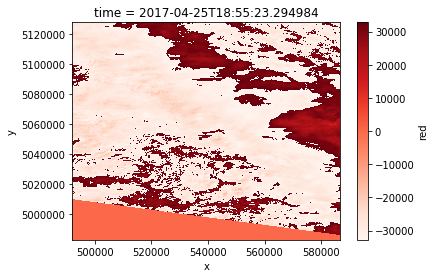

In [39]:
ds.red.isel(time=1).plot(cmap='Reds')


### NDVI PLOT 

In [42]:
import matplotlib

In [43]:
ndvi = ((ds.nir-ds.red)/(ds.nir+ds.red))

In [44]:
ndvi_cmap = matplotlib.colors.ListedColormap(['blue', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600'])

In [45]:
ndvi_bounds = [-1, 0, 0.1, 0.25, 0.35, 0.5, 0.8, 1]

In [46]:
ndvi_norm = matplotlib.colors.BoundaryNorm(ndvi_bounds,ndvi_cmap.N)

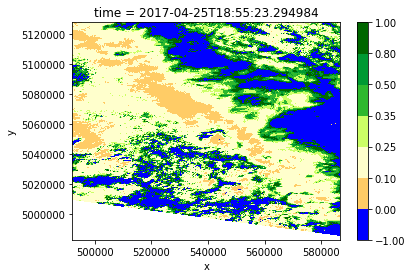

In [47]:
ndvi.isel(time=1).plot(cmap =ndvi_cmap, norm = ndvi_norm )